to practice regex in an interactive GUI software, do it in this website.
https://regex101.com/ and https://regexr.com/

# Chapter 4 Look Around

Until this point, we have learned different mechanisms of matching characters while discarding them. A character that is already matched cannot be compared again, and the only way to match any upcoming character is by discarding it.

The exceptions to this are a number of metacharacters we have studied, the so-called **zero-width assertions**. These characters indicate positions rather than actual content. For instance, the caret symbol (^) is a representation of the beginning of a line or the dollar sign ($) for the end of a line. They just ensure that the position in the input is correct without actually consuming or matching any character.

A more powerful kind of zero-width assertion is **look around**, a mechanism with which it is possible *to match a certain previous* (**look behind**) or *ulterior* (**look ahead**) value to the current position. They effectively do assertion without consuming characters; they just return a positive or negative result of the match.

The look around mechanism is probably the most unknown and at the same time  
the most powerful technique in regular expressions. This mechanism allows us to 
create powerful regular expressions that cannot be written otherwise, either because of the complexity it would represent or just because of technical limitations of regular expressions without look around.

Both look ahead and look behind could be subdivided into another two types each: positive and negative:
-  Positive look ahead: This mechanism is represented as an expression preceded by a question mark and an equals sign, ```?=```, inside a parenthesis block. For example, ```(?=regex)``` will match if the passed regex do match against the forthcoming input.
-  Negative look ahead: This mechanism is specifed as an expression preceded by a question mark and an exclamation mark, ```?!```, inside a parenthesis block. For example, ```'(?!regex')``` will match if the passed regex do not match against the forthcoming input.
-  Positive look behind: This mechanism is represented as an expression preceded by a question mark, a less-than sign, and an equals sign, ```?<=```, inside a parenthesis block. For example, ```'(?<=regex)'``` will match if the passed regex do match against the previous input.
-  Negative look behind: This mechanism is represented as an expression preceded by a question mark, a less-than sign, and an exclamation mark, ```?<!```, inside a parenthesis block. For example, ```(?<!regex')``` will match if the passed regex do not match against the previous input. 

Let's start looking forward to the next section.

- Positive look ahead: Mekanisme ini direpresentasikan sebagai ekspresi yang didahului oleh tanda tanya dan tanda sama dengan, ```?=```, di dalam blok kurung. Misalnya, ```'(?=regex')``` akan cocok jika regex yang diteruskan cocok dengan input yang akan datang.
- Positive look behind: Mekanisme ini direpresentasikan sebagai ekspresi yang didahului oleh tanda tanya, tanda kurang dari, dan tanda sama dengan, ```?<=```, di dalam blok kurung. Misalnya, ```'(?<=regex)'``` akan cocok jika ekspresi reguler yang diteruskan cocok dengan input sebelumnya.

# Look ahead

The frst type of look around mechanism that we are going to study is **the look ahead** mechanism. It tries to match ahead the subexpression passed as an argument. The zero-width nature of the two look around operations render them complex and 
diffcult to understand

As we know from the previous section, it is represented as an expression preceded by a question mark and an equals sign, ```?=```, inside a parenthesis block: ```(?=regex)```.

Let's start tackling this by comparing the result of the two similar regular 
expressions. We can recall that in Chapter 1, Introducing Regular Expressions, we matched the expression ```'fox'``` to the phrase ```The quick brown fox jumps over 
the lazy dog```. Let's also apply the expression ```'(?=fox)'``` to the same input:

In [2]:
import re

In [4]:
string = r'The quick brown fox jumps over the lazy dog'

In [3]:
pattern1 = re.compile(r'fox')

In [5]:
result = pattern1.search(string)

In [6]:
result

<re.Match object; span=(16, 19), match='fox'>

In [7]:
print(result.start(), result.end())

16 19


We just searched the literal fox in the input string, and just as expected we have found it between the index 16 and 19. Let's see the following example of the look ahead mechanism:

In [8]:
pattern2 = re.compile(r'(?=fox)')

In [9]:
result2 = pattern2.search(string)
result2

<re.Match object; span=(16, 16), match=''>

In [10]:
print(result2.start(), result2.end())

16 16


This time we have applied the expression ```'(?=fox)'``` instead. The result has been 
just a position at the index 16 (both the start and end point to the same index). This is because **look around does not consume characters**, and therefore, it can be used to filter **where the expression should match**. However, it will not define the contents of the result.

Let's use this feature again to try and match any word that is followed by a comma character (,) using the following regular expression ```'\w+(?=,)'``` and the text ```They were three: Felix, Victor, and Carlos.```:

In [11]:
pattern3 = re.compile('\w+(?=,)')

In [17]:
pattern3.findall('They were three: Felix, Victor, and Carlos.')

['Felix', 'Victor']

We created a regular expression that accepts any repetition of alphanumeric characters followed by a comma character that is not going to be used as a part of the result. Therefore, only Felix and Victor were part of the result as Carlos didn't have a comma after the name.

How different was this compared to the use of the regular expressions we have up to this chapter? Let's compare the results by applying ```'\w+,'``` to the same text:

In [20]:
pattern4 = re.compile('\w+,')

In [21]:
pattern4.findall('They were three: Felix, Victor, and Carlos.')

['Felix,', 'Victor,']

With the preceding regular expressions, we asked the regular expression engine to accept any repetition of alphanumeric characters followed by a comma character. Therefore, *the alphanumeric characters and the comma character* will be returned, as we can see in the listing.

It's noteworthy that *the look ahead mechanism is another subexpression* that can be leveraged with all the power of regular expressions (it's not the same case for the look behind mechanism as we will discover later). Therefore, we can use all the constructions we learned so far as the alternation:

In [22]:
pattern5 = re.compile(r'\w+(?=,|\.)')

In [23]:
pattern5.findall('They were three: Felix, Victor, and Carlos.')

['Felix', 'Victor', 'Carlos']

In the preceding example, we used alternation (even though we could have used other simpler techniques as a character set) to accept any repetition of alphanumeric characters followed by a comma or dot character that is not going to be used as a part of the result.

In [24]:
# instead of using alteration |, we will try to use character set
pattern6 = re.compile(r'\w+(?=[,\.])')

pattern6.findall('They were three: Felix, Victor, and Carlos.')

['Felix', 'Victor', 'Carlos']

# Negative look ahead

The negative look ahead mechanism presents the same nature of the look ahead but with a notable distinction: **the result will be valid only if the subexpression doesn't match**.

It is represented as an expression preceded by a question mark and an exclamation mark, ```?!```, inside a parenthesis block: ```(?!regex)```.

This is useful when we want *to express what should not happen*. For instance, to fnd any name ```John``` that is not ```John Smith```, we could do the following:

In [25]:
pattern_neg_la1 = re.compile(r'John(?!\sSmith)')

In [89]:
result = pattern_neg_la1.finditer("I would rather go out with John McLane than with John Smith or John Bon Jovi")

for i in result:
    print(i)
    print(i.start(), i.end())

<re.Match object; span=(27, 31), match='John'>
27 31
<re.Match object; span=(63, 67), match='John'>
63 67


In [28]:
re.findall(pattern_neg_la1, "I would rather go out with John McLane than with John Smith or John Bon Jovi" )

['John', 'John']

In [33]:
re.search(pattern_neg_la1, "I would rather go out with John McLane than with John Smith or John Bon Jovi" ).span()

(27, 31)

In [38]:
results = re.finditer(pattern_neg_la1, "I would rather go out with John McLane than with John Smith or John Bon Jovi")

for i in results:
    print(i)

<re.Match object; span=(27, 31), match='John'>
<re.Match object; span=(63, 67), match='John'>


In the preceding example, we looked for John by consuming these five characters 
and then looked ahead for a whitespace character followed by the word Smith. In 
case of a match, the match will contain only the starting and end position of John. In this case, the positions are 27-31 for John McLane and 63-67 for John Bon Jovi.

Now, we are able to leverage the more basic forms of look around: the positive and negative look ahead. Let's learn how to get the most of it in substitutions and groups.

# Look around and substitutions

The zero-width nature of the look around operation is especially useful in substitutions. Thanks to them, we are able to perform transformations that would otherwise be extremely complex to read and write.

**One typical example of look ahead and substitutions** would be the conversion of a number composed of just numeric characters, such as ```1234567890```, into a comma separated number, that is, ```1,234,567,890```.

In order to write this regular expression, we will need a strategy to follow. What we want to do is group the numbers in blocks of three that will then be substituted by the same group plus a comma character.

We can easily start with an almost naive approach with the following highlighted regular expression:

In [42]:
pattern_la_subs1 = re.compile(r'\d{1,3}')

In [43]:
pattern_la_subs1.findall("The number is: 12345567890")

['123', '455', '678', '90']

We have failed in this attempt. We are effectively grouping in blocks of three 
numbers, but they should be taken from the right to the left. We need a different approach. Let's try to fnd one, two, or three digits that have to be followed by any number of blocks of three digits until we fnd something that is not a digit.

This will have the following effect on our number. When trying to find one, two, or three digits, the regular expression will start taking just one, and this will be the number 1. Then, it will try to catch blocks of exactly three numbers, for example, 234, 567, 890, until it finds a non-digit. This is the end of the input.

If we express in a regular expression what we have just explained in plain English, we will obtain the following:

```'\d{1,3}(?=(\d{3})+(?!\d))'```

|Element |Description|
| :- | :- |
|\d |This matches a decimal character |
|{1,3} |This indicates that the match is repeated between one and threetimes |
|(?= |This indicates that the character is followed by (but not consuming) this expression |
|( | This indicates a group |
|\d |This indicates that there is a group of decimal characters |
|{3} |This indicates that the match is repeated three times |
|)  |
|+  |This indicates that the decimal character should appear one or more times|
|(?!|This indicates that the match is not followed by (but not consuming) what the following expression defines |
|\d |This indicates a decimal character |
))

Let's try again with this new regular expression in Python's console:

In [86]:
pattern_la_subs2 = re.compile(r'\d{1,3}(?=(\d{3})+(?!\d))')
results2 = pattern_la_subs2.finditer('1234567890')

for i in results2:
    print(i)
    print(i.start(), i.end())

<re.Match object; span=(0, 1), match='1'>
0 1
<re.Match object; span=(1, 4), match='234'>
1 4
<re.Match object; span=(4, 7), match='567'>
4 7


In [53]:
# try this one to find all matched character from the string
# re.search(pattern_la_subs2, '1234567890')

This time, we can see that we are using the right approach as we have just identifed the correct blocks: ```1```, ```234```, ```567```, and ```890```.

Now, we just need to use a substitution to substitute each of the matches we have found for the same match result plus a comma character. We already know how to use substitutions as we learned it in *Chapter 2, Regular Expressions with Python*, so let's just put it into practice

In [54]:
pattern_la_subs2 = re.compile(r'\d{1,3}(?=(\d{3})+(?!\d))')
pattern_la_subs2.sub(r'\g<0>,', "1234567890")

'1,234,567,890'

Et voila! We have just transformed an unformatted number into a beautiful number with a thousand separators.

We have just learned the two techniques to look ahead and foresee what is coming. We have also studied their usage in substitutions. Now, let's turn our head back to see what we have left behind **look behind**.

# Look behind

We could safely define look behind as the opposite operation to look ahead. It tries to match behind the subexpression passed as an argument. It has a zero width nature as well, and therefore, it won't be part of the result.

It is represented as an expression preceded by a question mark, a less-than sign, and an equals sign, ```?<=```, inside a parenthesis block: ```(?<=regex)```.

We could, for instance, use it in an example similar to the one we used in negative look ahead to find *just the surname of someone named John McLane*. To accomplish this, we could write a look behind like the following:

In [55]:
pattern_lb1 = re.compile(r'(?<=John\s)McLane')

In [59]:
result_lb1 = pattern_lb1.finditer("I would rather go out with John McLane than with John Smith or John Bon Jovi")

for i in result_lb1:
    print(i)
    print(i.start(), i.end())

<re.Match object; span=(32, 38), match='McLane'>
32 38


**With the preceding look behind, we requested the regex engine to match *only positions that are preceded with ```John``` and a whitespace* to then consume ```McLane``` as a result.**

In Python's re module, there is, however, a fundamental difference between how 
look ahead and look behind are implemented. Due to a number of deeply rooted 
technical reasons, the look behind mechanism is only able to match fxed-width 
patterns. If variable-width patterns in look behind are required, the regex module at https://pypi.python.org/pypi/regex can be leveraged instead of the standard Python re module.

Fixed-width patterns don't contain variable-length matchers such as the quantifers we studied in *Chapter 1, Introducing Regular Expressions*. Other variable-length constructions such as back references aren't allowed either. Alternation is allowed but only if the alternatives have the same length. Again, these limitations are not present in the aforementioned regex module.

Let's see what'll happen if we use an alternation with different length alternatives in a back reference:

In [60]:
pattern_lb2 = re.compile(r'(?<=(John|Jonathan)\s)McLane')

error: look-behind requires fixed-width pattern

We've got an exception as look behind requires a fxed-width pattern. We will get a similar result if we try to apply quantifers or other variable-length constructions.

Now that we have learned different techniques to match ahead or behind without 
consuming characters and the different limitations we might have, we can try to 
write another example that embraces a few of the mechanisms **that we have studied to solve a real-world problem**.

Let's assume that we want to extract any Twitter username that is present in a tweet in order to create an automatic mood detection system. To write a regular expression in order to extract them, we should start by identifying how a Twitter username is represented. If we browse the Twitter's site https://support.twitter.com/articles/101299-why-can-t-i-register-certain-usernames, we might find the following description:

```"A username can only contain alphanumeric characters (letters A-Z, numbers 0-9)with the exception of underscores, as noted above. Check to make sure your desired username doesn't contain any symbols, dashes, or spaces."```

For our development tests, we are going to use this Packt Publishing tweet:

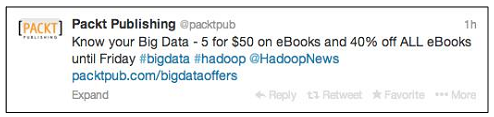

The first thing we should be able to construct is a character set with all the  characters that could potentially be used in a Twitter username. This could be  any alphanumeric character followed by the underscore character as we just found in the previous Twitter support article. Therefore, we could construct a character set similar to the following:

```[\w_]```

This will represent all the parts that we want to extract from the username. Then, we will need to prepend a word boundary and the at symbol (```@```) that will be used to locate the usernames:

```'\B@[\w_]+'```

The reason behind using the word boundary is that we don't want to get confused 
with e-mails and so on. We are looking only for text that follows the start of the line or a word boundary, then followed by an ```@``` symbol, and then just a number of alphanumeric or underscore characters. The examples are as follows:

- ```@vromer0``` is a valid username
- ```iam@vromer0``` is not valid username as it should start with the ```@``` symbol
- ```@vromero.org``` is not a valid username as it contain an invalid character

If we use the regular expression we have at the moment, we will obtain the following result:

In [87]:
pattern_rwp = re.compile(r'\B@[\w_]+')

In [62]:
pattern_rwp.findall("Know your Big Data = 5 for $50 on eBooks and 40% off all eBooks until Friday #bigdata #hadoop @HadoopNews packtpub.com/bigdataoffers")

['@HadoopNews']

Now We do want to match just the username without including the preceding @ symbol. 

At this point, a **look behind** mechanism becomes useful. We can include the word boundary and the ```@``` symbol in a look behind subexpression so that they don't become a part of the matched result:

In [63]:
pattern_rwp2 = re.compile(r'(?<=\B@)[\w_]+')

In [64]:
pattern_rwp2.findall("Know your Big Data = 5 for $50 on eBooks and 40% off all eBooks until Friday #bigdata #hadoop @HadoopNews packtpub.com/bigdataoffers")

['HadoopNews']

And now we have accomplished our goal.

# Negative look behind

The negative look behind mechanism presents the very same nature of the main look behind mechanism, but we will only have a valid result if the passed subexpression doesn't match.

It is represented as an expression preceded by a question mark, a less-than sign, and an exclamation mark, ```?<!```, inside a parenthesis block: ```(?<!regex)```.

It is worth remembering that negative look behind not only shares most of the 
characteristics of the look behind mechanism, but it also shares the limitations. The negative look behind mechanism is only able to match fxed-width patterns. These have the same cause and implications as we have studied in the previous section.

We could put this into practice by trying to match any person surnamed ```Doe``` who is not named ```John``` with a regular expression like this: ```'(?<!John\s)Doe'```. If we use it in Python's console, we will obtain the following result:

In [73]:
pattern_neg_lb1 = re.compile('(?<!John\s)Doe')

In [74]:
result_neg_lb1 = pattern_neg_lb1.finditer("John Doe, Calvin Doe, Hobbes Doe")

In [75]:
for i in result_neg_lb1:
    print(i)

<re.Match object; span=(17, 20), match='Doe'>
<re.Match object; span=(29, 32), match='Doe'>


# Look around and groups

Another benefcial use of look around constructions is inside groups.  
Typically, when groups are used, a very specific result has to be matched and 
returned inside the group. As we don't want to pollute the groups with information that is not required, among other potential options we can leverage look around as a favorable solution.

Let's say that we need to get a comma-separated value, the first part of the value is  a name, while the second is a value. The format would be similar to this:

```"INFO 2013-09-17 12:13:44,487 authentication failed"```

As we learned in *Chapter 3, Grouping*, we can easily write an expression that will get these two values like the following:

```'\w+\s[\d-]+\s[\d:,]+\s(.*\sfailed)'```

In [84]:
pattern_la_gr1 = re.compile(r'\w+\s[\d-]+\s[\d:,]+\s(.*\sfailed)')

In [85]:
re.findall(pattern_la_gr1, "INFO 2013-09-17 12:13:44,487 authentication failed")

['authentication failed']

However, we only want to match when the failure is not an authentication failure. We can accomplish this with *the addition of* **a negative look behind**. It will look like this: 

```'\w+\s[\d-]+\s[\d:,]+\s(.*(?<!authentication\s)failed)'```

Once we put this in Python's console, we will get the following output:

In [79]:
pattern_la_gr = re.compile(r'\w+\s[\d-]+\s[\d:,]+\s(.*(?<!authentication\s)failed)')

In [80]:

pattern_la_gr.findall("INFO 2013-09-17 12:13:44,487 authentication failed")

[]

In [81]:
pattern_la_gr.findall("INFO 2013-09-17 12:13:44,487 something else failed")

['something else failed']

# Summary

In this chapter, we learned the concept of zero-with assertions and how it can be useful to find the exact thing in a text without interfering in the result content.

We have also learned how to leverage the four types of look around mechanisms: 
positive look ahead, negative look ahead, positive look behind, and negative  
look behind.

We also reviewed, with special interest, the limitation of the two types of look behind with the variable assertions.

With this, we conclude the travel through the basic and advanced techniques  
around regular expressions. Now, we are ready to focus on performance tuning  
in the next chapter.